<a href="https://colab.research.google.com/github/Tattou20/Machine_Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ursulla Navalona Arivola - n01586516
Assignment 4

## DBSCAN clustering algorithm


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dr=pd.read_csv('gdrive/My Drive/Mall_Customers.csv')

In [ ]:
dr

In [ ]:
type(dr)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Annual Income (k$)')

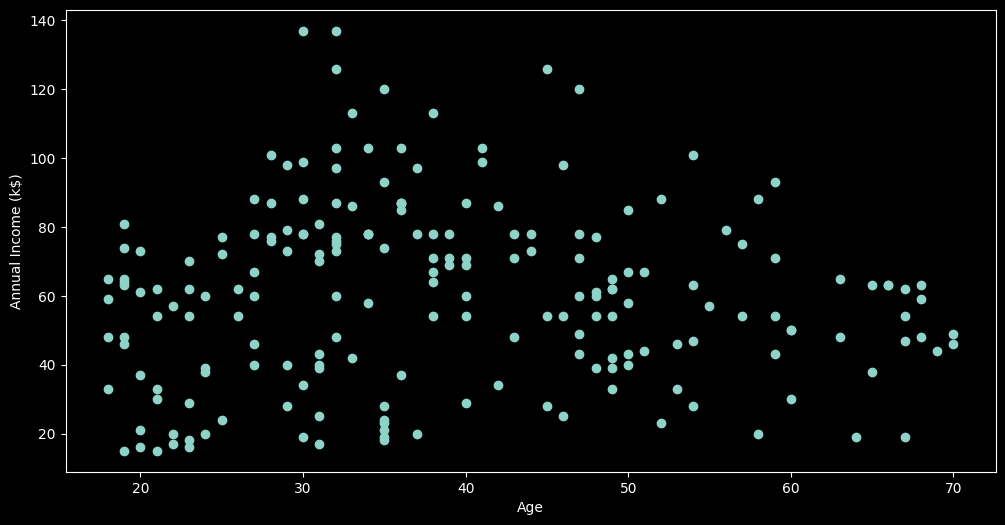

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(dr.Age,dr['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

## Selecting Value of Epsilon


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan =DBSCAN(eps= 5.75) # changing epsilon from 0.01, 0.5, 1
y_pred = dbscan.fit_predict(dr[['Age','Annual Income (k$)']])

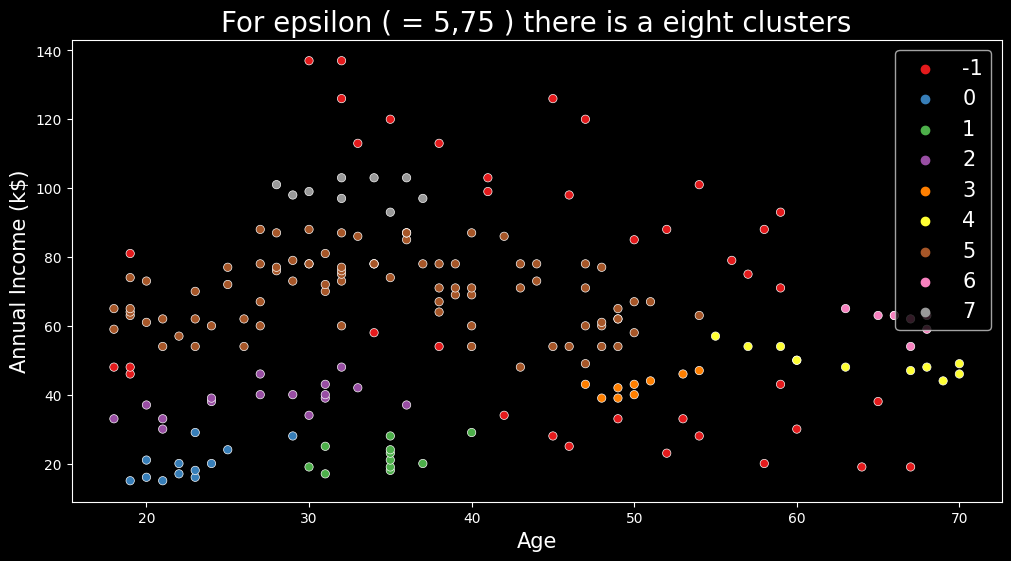

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=dr[['Age', 'Annual Income (k$)']], x='Age', y='Annual Income (k$)', hue=y_pred, palette='Set1')
plt.title('For epsilon ( = 5,75 ) there is a eight clusters', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Annual Income (k$)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

By the DBSCAN of the dataset, we can see that we have 8 clusters with the epsilon of 5.75 and red outliers outside who don't belong to any clusters.


In [ ]:
outliers = []
eps_range = np.linspace(0.001,10,1000)

for eps in eps_range:

    dbscan = DBSCAN(eps=eps)
    y_pred = dbscan.fit_predict(dr[['Age','Annual Income (k$)']])

    points = 100 * np.sum(y_pred == -1)/len(y_pred)

    outliers.append(points)

a

s

c

d

e

Text(0.5, 1.0, 'Selecting Values of Epsilon')

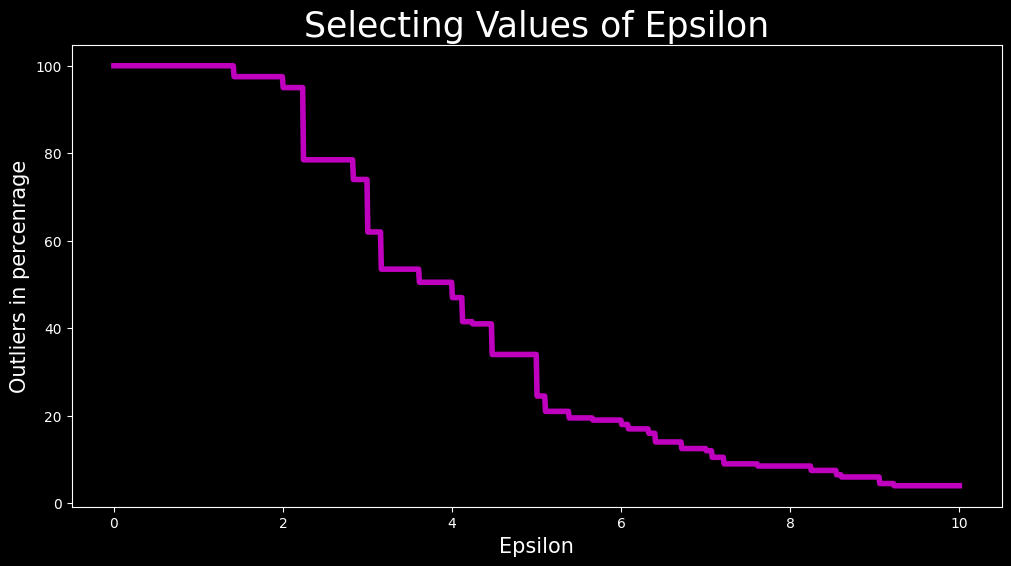

In [ ]:
plt.figure(figsize = (12,6))
plt.plot( eps_range, outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Epsilon", fontsize = 15)
plt.title("Selecting Values of Epsilon", fontsize = 25)

In this graph, we can see huge difference where the number of the outliers start to decrease when the value of the Epsilon is more than two.

## Selecting Minimum samples for clusters

In [ ]:
samp_outliers = []
samples_range = np.arange(1,11)

for samples in samples_range :

    dbscan = DBSCAN(min_samples = samples)
    y_pred = dbscan.fit_predict(dr[['Age','Annual Income (k$)']])

    points = 100 * np.sum(y_pred == -1)/len(y_pred)

    samp_outliers.append(points)

(1.0, 10.0)

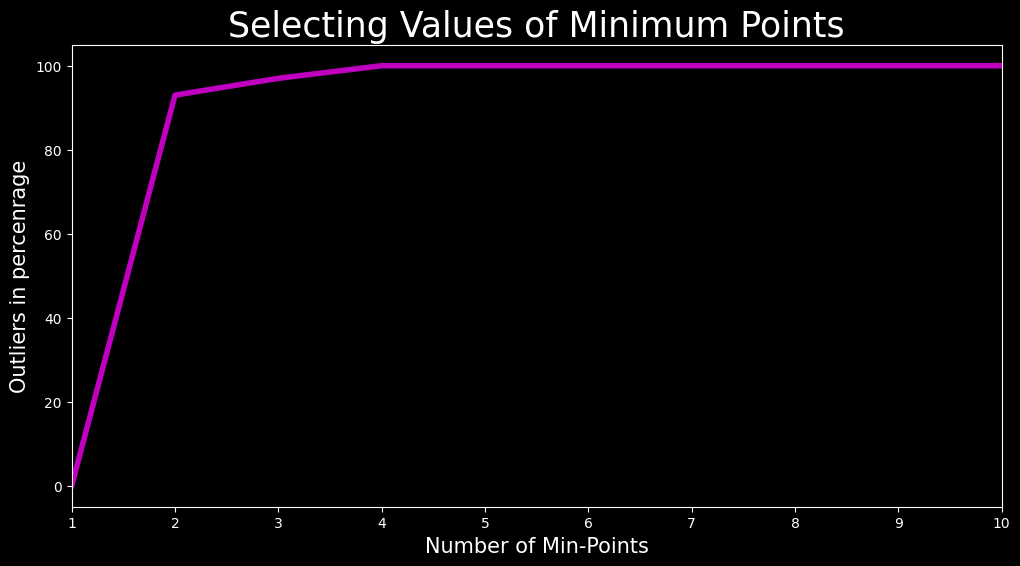

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(samples_range, samp_outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Number of Min-Points", fontsize = 15)
plt.title("Selecting Values of Minimum Points", fontsize = 25)
plt.xlim([1,10])

In this graph, we can see that there is an huge increase of outliiers if the number of Min-Points is between 0 and 2, and more than two, all the points became almost all outliers.

## Evaluation of clustering performance using CH-Index and Silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(f"Silhouette Score: {silhouette_score(dr[['Age', 'Annual Income (k$)']], y_pred)}")

Silhouette Score: 0.07


In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(dr[['Age','Annual Income (k$)']], y_pred)

1.0

## Comparison of Hierarchical clustering with K-means clustering

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_predicted = kmeans.fit_predict(dr[['Age','Annual Income (k$)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(dr[['Age','Annual Income (k$)']], y_predicted)

222.29430735908878

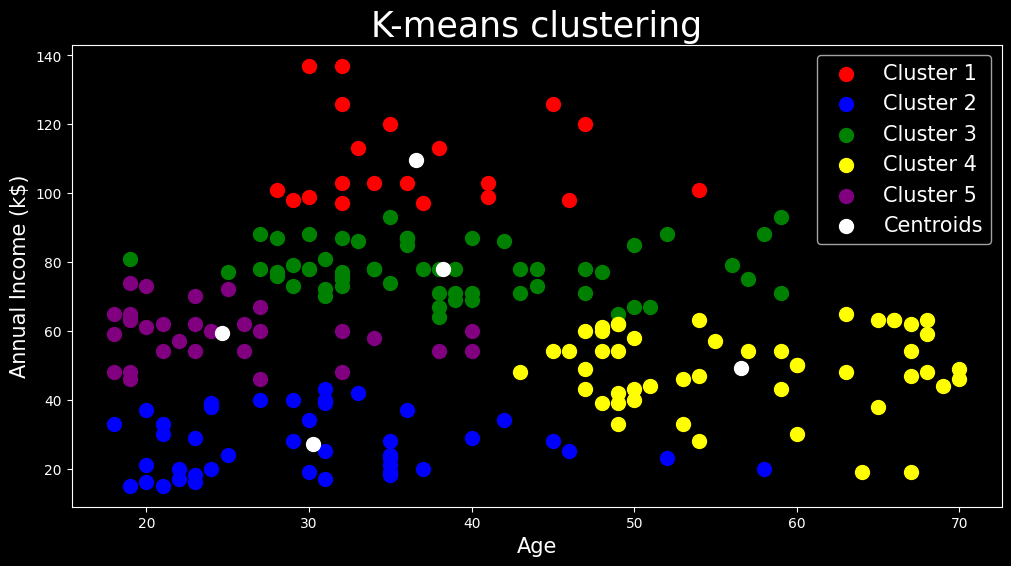

In [ ]:
dr['cluster']=y_predicted
plt.figure(figsize = (12,6))

plt.tight_layout()
dr1=dr[dr.cluster==0]
dr2=dr[dr.cluster==1]
dr3=dr[dr.cluster==2]
dr4=dr[dr.cluster==3]
dr5=dr[dr.cluster==4]
plt.scatter(dr1.Age,dr1['Annual Income (k$)'], s=100,color='red', label = 'Cluster 1')
plt.scatter(dr2.Age,dr2['Annual Income (k$)'], s=100,color='blue', label = 'Cluster 2')
plt.scatter(dr3.Age,dr3['Annual Income (k$)'], s=100,color='green', label = 'Cluster 3')
plt.scatter(dr4.Age,dr4['Annual Income (k$)'], s=100,color='yellow', label = 'Cluster 4')
plt.scatter(dr5.Age,dr5['Annual Income (k$)'], s=100, color='purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'white', label = 'Centroids')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Annual Income (k$)',fontsize = 15)
plt.title('K-means clustering', fontsize = 25)
plt.legend(fontsize = 15)



With the DBSCAN, it automatically gives us the number of cluster instead of the K-Means algorithm where we should input it.

For min_samples ( = 1 ) there are only clusters and no outlier. And we can fount 192 clusters.

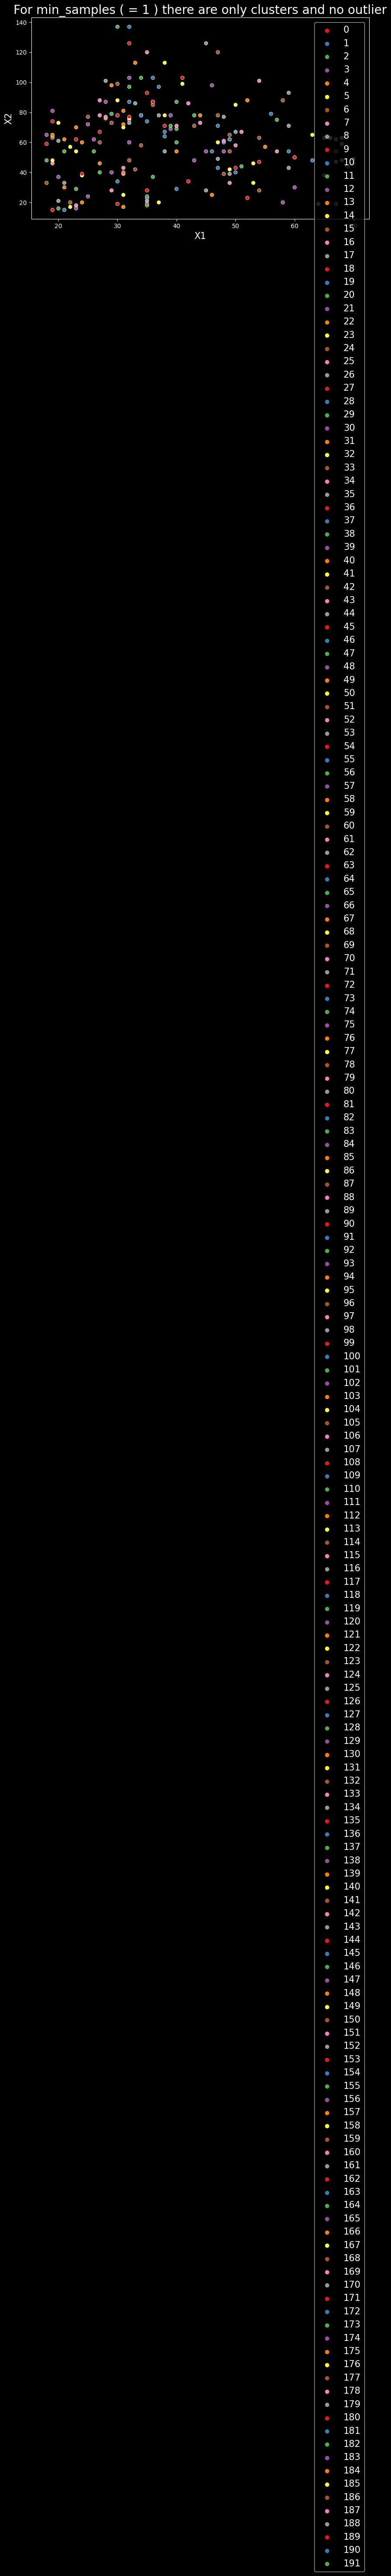

In [ ]:
dbscan = DBSCAN(min_samples = 1)
y_pred = dbscan.fit_predict(dr[['Age','Annual Income (k$)']])
plt.figure(figsize = (10,6))
sns.scatterplot(data=dr[['Age', 'Annual Income (k$)']], x='Age', y='Annual Income (k$)', hue=y_pred, palette='Set1')
plt.title('For min_samples ( = 1 ) there are only clusters and no outlier', fontsize = 20)
plt.xlabel('X1', fontsize = 15)
plt.ylabel('X2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()